# Project 2 : Movielens Case Study

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

## Task 1: Import the three datasets.

### Movies Dataset

In [3]:
movies = ['MovieID','Title','Genres']
mdf = pd.read_csv('/Users/nawaz/myFolder/myDocs/Data_Science/Dataset/movies.dat', header=None, delimiter='::', names=movies)

In [3]:
mdf.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
mdf.shape

(3883, 3)

In [5]:
mdf.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [6]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


### Users Dataset

In [7]:
users = ['UserID','Gender','Age','Occupation','Zip-code']
udf = pd.read_csv('/myFolder/myDocs/Data_Science/Dataset/users.dat', header=None, delimiter='::', names=users)

In [8]:
udf.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [9]:
udf.shape

(6040, 5)

In [10]:
udf.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [11]:
udf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


### Ratings Dataset

In [12]:
ratings = ['UserID','MovieID','Rating','Timestamp']
rdf = pd.read_csv('/myFolder/myDocs/Data_Science/Dataset/ratings.dat', header=None, delimiter='::', names=ratings)

In [13]:
rdf.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [14]:
rdf.shape

(1000209, 4)

In [15]:
rdf.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [16]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


## Task 2: Merge the three datasets.

In [17]:
df = rdf.merge(udf, how='outer', on='UserID')
df = df.merge(mdf, how='outer', on='MovieID')

In [18]:
df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1.0,1193,5.0,978300760.0,F,1.0,10.0,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2.0,1193,5.0,978298413.0,M,56.0,16.0,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12.0,1193,4.0,978220179.0,M,25.0,12.0,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15.0,1193,4.0,978199279.0,M,25.0,7.0,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17.0,1193,5.0,978158471.0,M,50.0,1.0,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000386 entries, 0 to 1000385
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   UserID      1000209 non-null  float64
 1   MovieID     1000386 non-null  int64  
 2   Rating      1000209 non-null  float64
 3   Timestamp   1000209 non-null  float64
 4   Gender      1000209 non-null  object 
 5   Age         1000209 non-null  float64
 6   Occupation  1000209 non-null  float64
 7   Zip-code    1000209 non-null  object 
 8   Title       1000386 non-null  object 
 9   Genres      1000386 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 84.0+ MB


In [20]:
df.shape

(1000386, 10)

In [21]:
#df.isna().sum()
df.isnull().sum()

UserID        177
MovieID         0
Rating        177
Timestamp     177
Gender        177
Age           177
Occupation    177
Zip-code      177
Title           0
Genres          0
dtype: int64

## Task 3: Explore the datasets.

In [22]:
df[df.isnull().any(axis=1)].shape

(177, 10)

In [23]:
# Droping the null rows
df.dropna(inplace=True)

In [24]:
df.isnull().sum()

UserID        0
MovieID       0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
Title         0
Genres        0
dtype: int64

### 3.1: User Age Distribution

In [25]:
udf['Age'].value_counts()

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: Age, dtype: int64

Text(0, 0.5, 'Number of  Users')

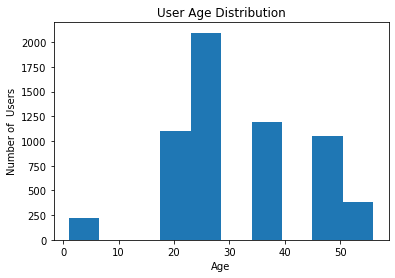

In [26]:
plt.hist(udf['Age'])
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of  Users')

### 3.2: User rating of the movie “Toy Story”

In [27]:
toy_story = df[df['Title'].str.contains('Toy Story')==True]

<AxesSubplot:ylabel='Title'>

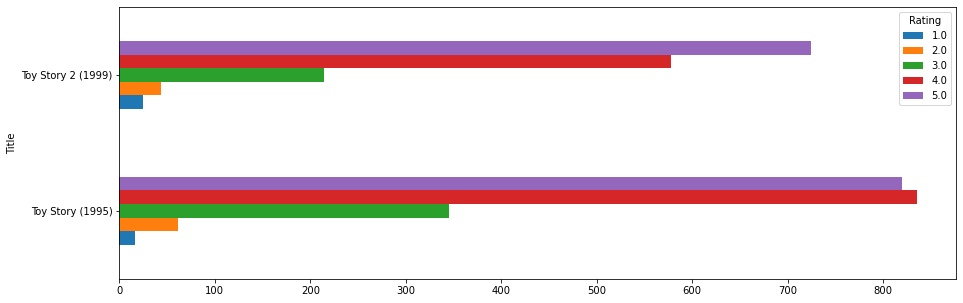

In [28]:
toy_story.groupby(['Title', 'Rating']).size().unstack().plot(kind = 'barh', figsize = (15,5))

### 3.3: Top 25 movies by viewership rating.

In [29]:
top25 = df.groupby(['Title']).Rating.count().sort_values(ascending= False).head(25)
top25

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

<AxesSubplot:ylabel='Title'>

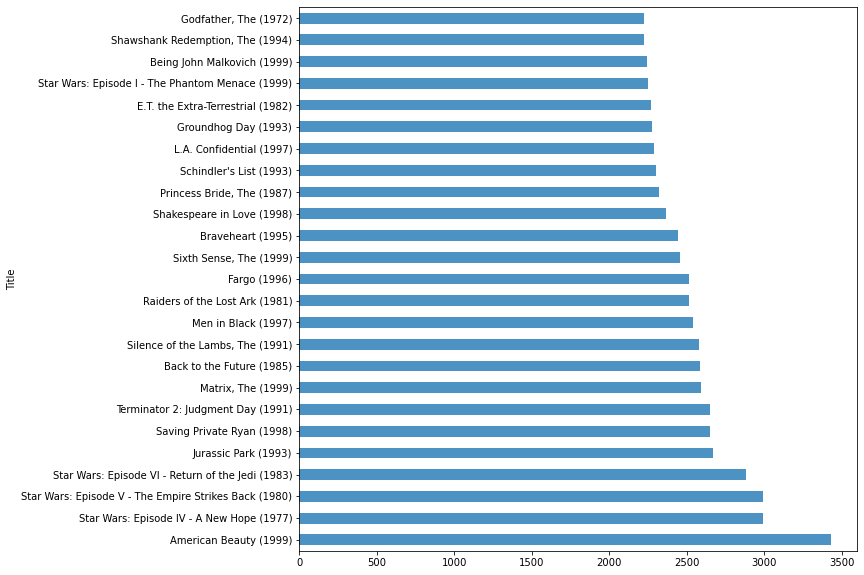

In [30]:
top25.plot(kind = 'barh',alpha = 0.8, figsize= (10, 10))

### 3.4: Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [31]:
userp = df[['Title', 'Rating']][df['UserID']==2696].sort_values('Rating', ascending= False)
userp

,Title,Rating
250014,Lone Star (1996),5.0
609204,"Game, The (1997)",4.0
612552,"Devil's Advocate, The (1997)",4.0
244232,L.A. Confidential (1997),4.0
689379,"Shining, The (1980)",4.0
277808,"Talented Mr. Ripley, The (1999)",4.0
371178,Midnight in the Garden of Good and Evil (1997),4.0
618708,Basic Instinct (1992),4.0
598042,Palmetto (1998),4.0
603189,"Perfect Murder, A (1998)",4.0


In [32]:
count = userp.groupby('Rating').size()
count

Rating
1.0     2
2.0     3
3.0     3
4.0    11
5.0     1
dtype: int64

<AxesSubplot:xlabel='Rating'>

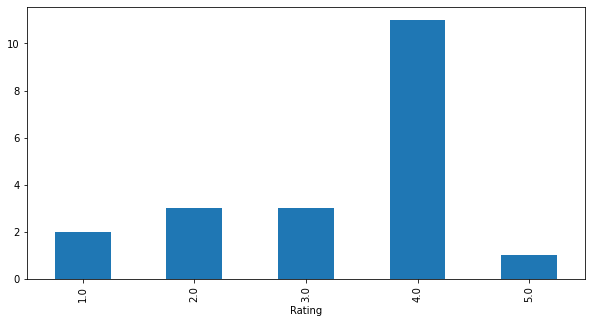

In [33]:
count.plot(kind = 'bar', figsize = (10,5))

## Task 4: Feature Engineering

### 4.1: Find out all the unique genres.

In [34]:
genre_list =df['Genres'].tolist()

In [35]:
type(genre_list), len(genre_list), len(list(set(genre_list)))

(list, 1000209, 301)

In [36]:
splitted_genre_list = []
for x in genre_list:
    list_item = x.split('|')
    splitted_genre_list.extend(list_item)

In [37]:
list(set(splitted_genre_list))

['Comedy',
 "Children's",
 'Crime',
 'Fantasy',
 'Documentary',
 'Western',
 'Horror',
 'Film-Noir',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Thriller',
 'Action',
 'Romance',
 'Musical',
 'Drama',
 'Animation',
 'War']

### 4.2: Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.

In [38]:
ohe = df['Genres'].str.get_dummies()
ohe.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [39]:
one_hot_encoding = pd.concat([df, ohe], axis =1)
one_hot_encoding.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1.0,1193,5.0,978300760.0,F,1.0,10.0,48067,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1193,5.0,978298413.0,M,56.0,16.0,70072,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
2,12.0,1193,4.0,978220179.0,M,25.0,12.0,32793,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
3,15.0,1193,4.0,978199279.0,M,25.0,7.0,22903,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
4,17.0,1193,5.0,978158471.0,M,50.0,1.0,95350,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0


In [40]:
one_hot_encoding.loc[123456]

UserID                                     3067
MovieID                                    1801
Rating                                        2
Timestamp                           9.70001e+08
Gender                                        F
Age                                          25
Occupation                                    0
Zip-code                                  02148
Title          Man in the Iron Mask, The (1998)
Genres                     Action|Drama|Romance
Action                                        1
Adventure                                     0
Animation                                     0
Children's                                    0
Comedy                                        0
Crime                                         0
Documentary                                   0
Drama                                         1
Fantasy                                       0
Film-Noir                                     0
Horror                                  

### 4.3: Determine the features affecting the ratings of any particular movie.

<AxesSubplot:xlabel='Gender'>

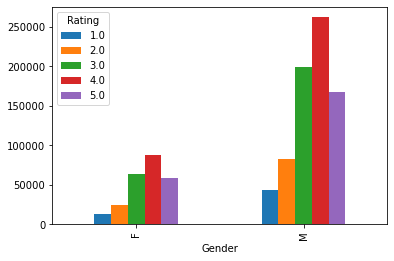

In [41]:
# Gender affecting the rating
df.groupby(['Gender', 'Rating']).size().unstack().plot(kind='bar')

<AxesSubplot:xlabel='Age'>

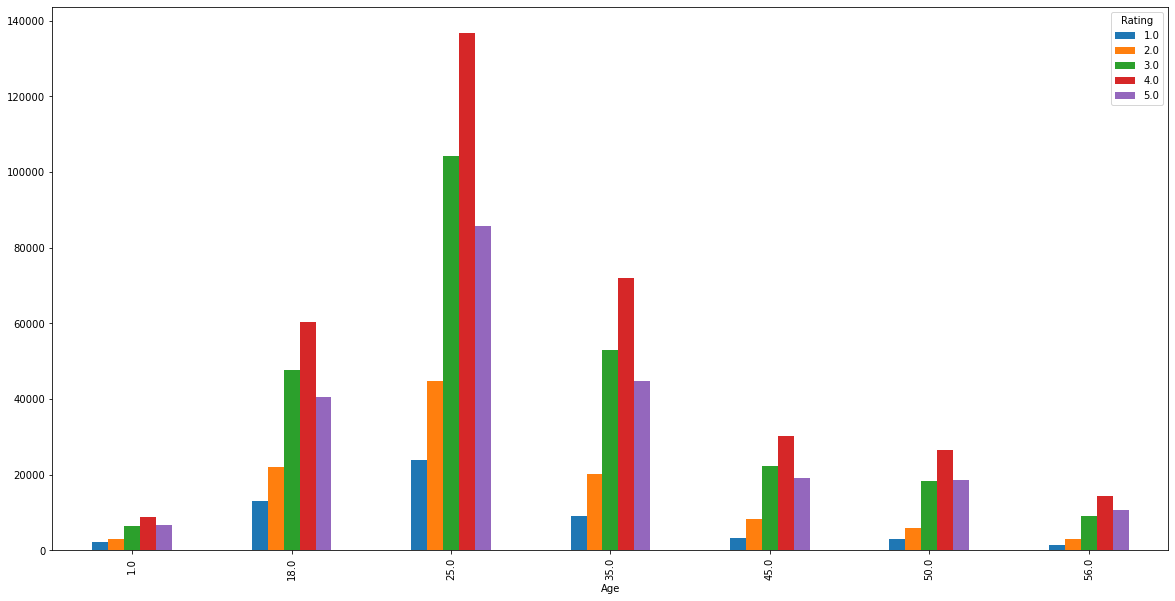

In [42]:
# Age affecting the rating
df.groupby(['Age', 'Rating']).size().unstack().plot(kind='bar', figsize=(20,10))

<AxesSubplot:xlabel='Occupation'>

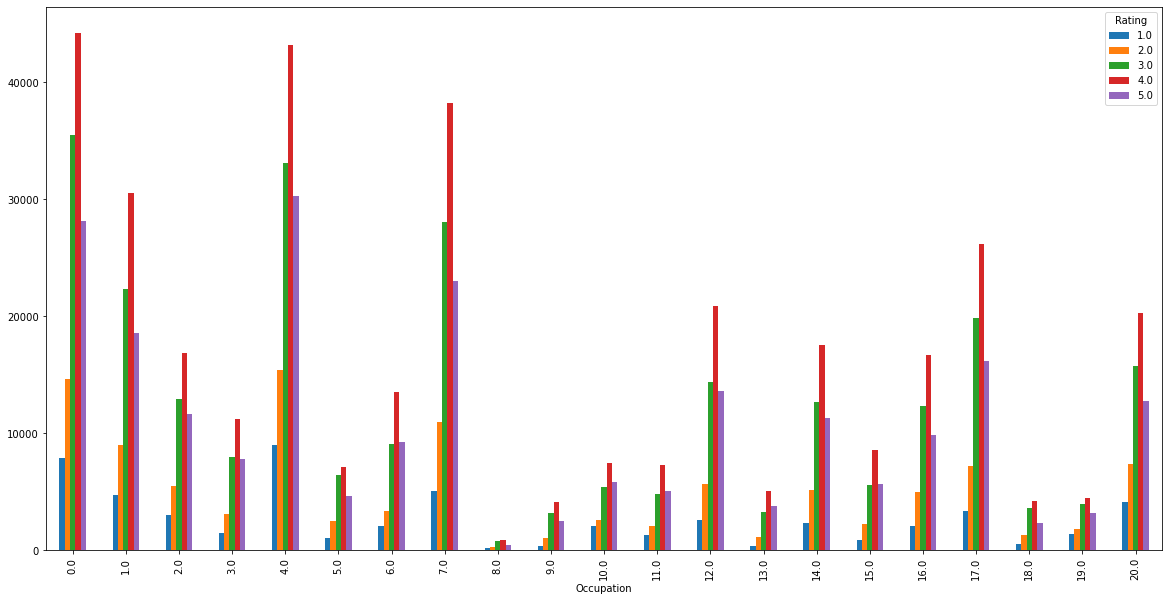

In [43]:
# Occupation affecting the rating
df.groupby(['Occupation', 'Rating']).size().unstack().plot(kind= 'bar',figsize =(20,10))

<AxesSubplot:>

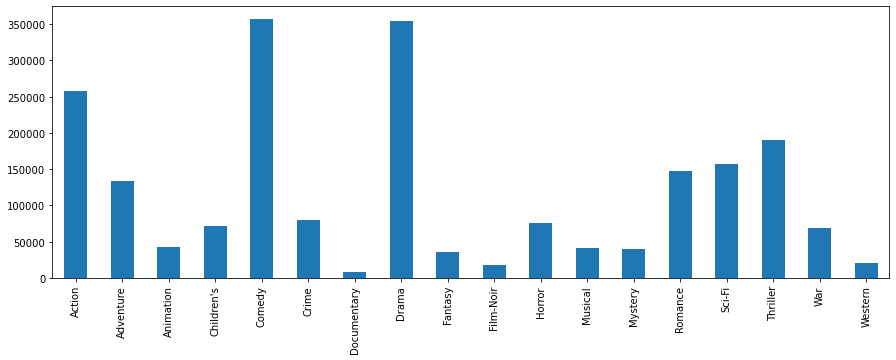

In [44]:
# Genre affecting the ratings
ohe.sum().plot(kind = 'bar', figsize = (15,5))

### 4.4: Develop an appropriate model to predict the movie ratings

In [45]:
model_data = df.head(500)

In [46]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UserID      500 non-null    float64
 1   MovieID     500 non-null    int64  
 2   Rating      500 non-null    float64
 3   Timestamp   500 non-null    float64
 4   Gender      500 non-null    object 
 5   Age         500 non-null    float64
 6   Occupation  500 non-null    float64
 7   Zip-code    500 non-null    object 
 8   Title       500 non-null    object 
 9   Genres      500 non-null    object 
dtypes: float64(5), int64(1), object(4)
memory usage: 43.0+ KB


In [47]:
# Replacing F and M with 0 and 1
model_data['Gender'] = model_data['Gender'].replace('F','0')
model_data['Gender'] = model_data['Gender'].replace('M','1')

In [48]:
# changing the type of gender column to integer
model_data['Gender']= model_data['Gender'].astype(int)

In [49]:
# Defining the x and y(independent and dependent variable)
x = model_data.drop(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Zip-code', 'Title', 'Genres'],axis =1).values
y = model_data['Rating'].values

In [50]:
# Splitting the data set into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state = 10, stratify=y)

In [51]:
x.shape, x_train.shape, x_test.shape

((500, 3), (375, 3), (125, 3))

### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100)

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

rf.score(x_test, y_test)

0.432

### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

lr.score(x_test, y_test)

0.512

### SVM

In [54]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)

svm.score(x_test, y_test)

0.52

### Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

dt.score(x_test, y_test)

0.384

### KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

knn.score(x_test, y_test)

0.368

### Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)

nb.score(x_test, y_test)

0.496

### Accuracy

In [58]:
print('Accuracy of Decision Tree Model is: ', dt.score(x_test, y_test)*100,'%'), 
print('Accuracy of Randon Forest Model is: ', rf.score(x_test, y_test)*100,'%'),
print('Accuracy of KNN Model is: ', knn.score(x_test, y_test)*100,'%'),
print('Accuracy of Naive Bayes Model is: ', nb.score(x_test, y_test)*100,'%'),
print('Accuracy of SVM Model is: ', svm.score(x_test, y_test)*100,'%'),
print('Accuracy of Logistic Regression Model is: ', lr.score(x_test, y_test)*100,'%')

Accuracy of Decision Tree Model is:  38.4 %
Accuracy of Randon Forest Model is:  43.2 %
Accuracy of KNN Model is:  36.8 %
Accuracy of Naive Bayes Model is:  49.6 %
Accuracy of SVM Model is:  52.0 %
Accuracy of Logistic Regression Model is:  51.2 %
